<a href="https://colab.research.google.com/github/JINAY08/EigenFaces/blob/main/FaceRecognitionUsingEigenFaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/JINAY08/EigenFaces/raw/main/attfaces.zip # # Imports and saves the dataset required for this Assignment

--2022-10-16 16:36:08--  https://github.com/JINAY08/EigenFaces/raw/main/attfaces.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JINAY08/EigenFaces/main/attfaces.zip [following]
--2022-10-16 16:36:09--  https://raw.githubusercontent.com/JINAY08/EigenFaces/main/attfaces.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3764752 (3.6M) [application/zip]
Saving to: ‘attfaces.zip’

attfaces.zip        100%[===================>]   3.59M  --.-KB/s    in 0.07s   

2022-10-16 16:36:09 (52.4 MB/s) - ‘attfaces.zip’ saved [3764752/3764752]



In [ ]:
!unzip -q attfaces -d "/content/attfaces/" # # Unzips the dataset saved in the form of a zip and saves it inside a folder named "Attfaces"

In [ ]:
!wget https://github.com/JINAY08/EigenFaces/raw/main/testimages.zip  # # # !Run this only for the last block of this notebook!
!unzip -q testimages

--2022-10-16 18:05:38--  https://github.com/JINAY08/EigenFaces/raw/main/testimages.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JINAY08/EigenFaces/main/testimages.zip [following]
--2022-10-16 18:05:38--  https://raw.githubusercontent.com/JINAY08/EigenFaces/main/testimages.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 771780 (754K) [application/zip]
Saving to: ‘testimages.zip.1’

testimages.zip.1    100%[===================>] 753.69K  --.-KB/s    in 0.04s   

2022-10-16 18:05:38 (16.5 MB/s) - ‘testimages.zip.1’ saved [771780/771780]

replace 2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]enam

In [ ]:
# # # Importing the important libraries # # #

import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [ ]:
os.makedirs('dataset/attfaces/', exist_ok =  True) # # Makes a folder attfaces inside of a dataset folder

for i in range(1,41):
  for filepath in sorted(glob.glob(f'attfaces/s{i}/*')): 
    os.makedirs(f'dataset/attfaces/s{i}/', exist_ok =  True)  # # # Makes folders si inside the newly created attfaces folder.(i=40 for 40 subjects)
    # print(filepath)
    c = cv2.VideoCapture(filepath) 
    j = 0
    filepathlist = filepath.split('.')
    p, q = c.read()
    filepathlist.append(str(j))
    
    # # # The following block converts the images from .pgm format to .jpg format.
    while p != False:
      filepathlist.pop(-1)
      filepathlist.append(str(j))
      j+=1
      filepath = '.'.join(filepathlist) + '.jpg'
      cv2.imwrite('dataset/' + filepath, q)
      p, q = c.read()

In [ ]:
from pathlib import Path
faces = {}
imagesset = []
folder = "/content/dataset/attfaces/"
for i in range(1,41):
  folder_dir = f"/content/dataset/attfaces/s{i}/"
  # print(folder_dir)
  images = Path(str(folder_dir)).glob('*.jpg')  # # # Forms a list of all paths that end with ".jpg"
  # print(images)
  images = sorted(images)
  # print(str(images[1]))
  for image in images:
    faces[f's{i}_{image}'] = cv2.imread(str(image), cv2.IMREAD_GRAYSCALE) # # # Forms a matrix of the paths of all the faces
  # print(faces.keys())
    # imagesset.append(str(image))
    # print(imagesset)

Dimensions of each image: (112, 92)


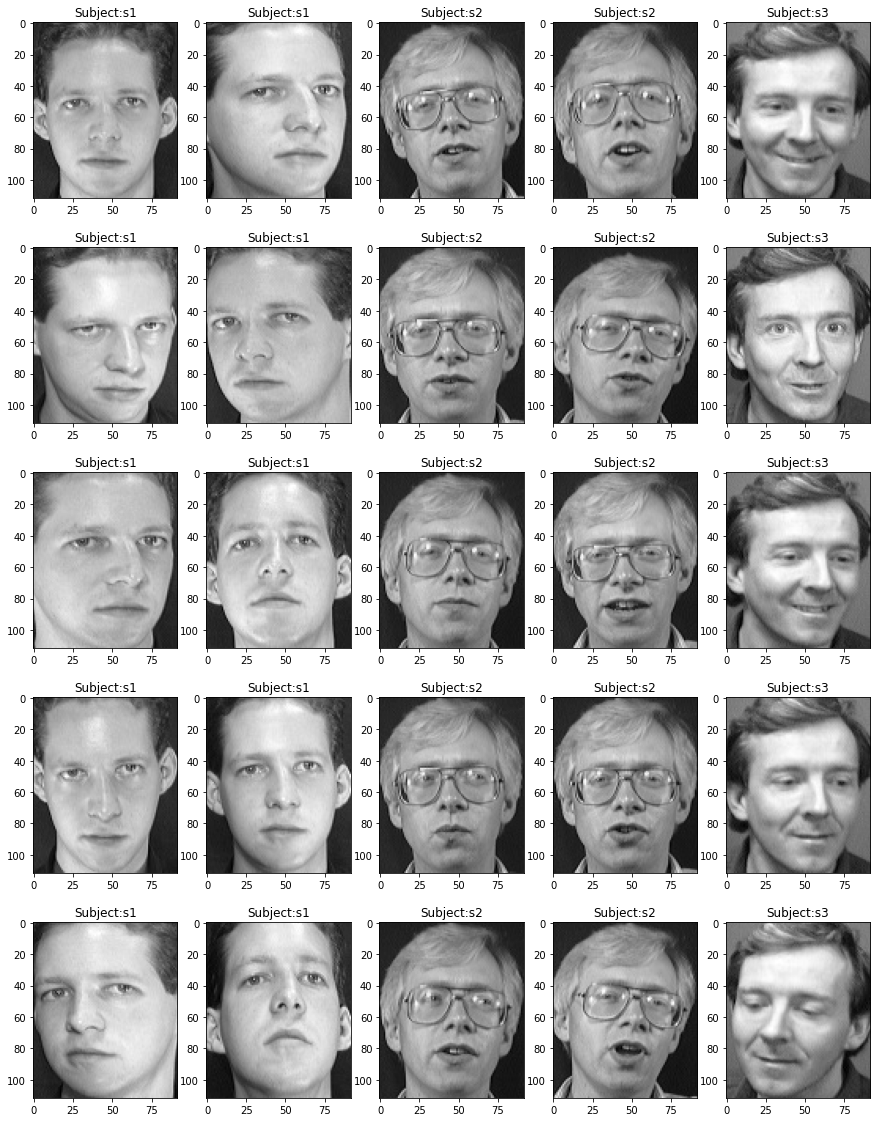

In [ ]:
# # # Plotting some of the images in the dataset
fig, axes = plt.subplots(5,5,figsize=(15,20))
faceimages = list(faces.values())[0:25]
height, width = list(faces.values())[0].shape # # # Height and width of each image

print(f'Dimensions of each image: {height, width}')

for i in range(25):
  axes[i%5][i//5].imshow(faceimages[i], cmap = "gray")
  axes[i%5][i//5].title.set_text('Subject:' + str(list(faces.keys())[i].split("_")[0]))
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
# trainset, testset = train_test_split(os.listdir('dataset/faces/'), train_size=0.8, test_size=0.2,  shuffle=True)

# # # Instead of randomly dividing between train and test set, we take a fix number of images (6) of each subject in the training set, as is described in the paper of Eigenfaces by the authors.
trainset = []
testset = []
count = {}
for i in list((faces.keys())):
  subject = i.split("_")[0]
  image = str(i.split("_")[1].split("/")[4]) + "/" + str(i.split("_")[1].split("/")[5])
  count[subject] = count.get(subject, 0) + 1
  if (count[subject]<=6):
    # print(image)
    trainset.append(image)
  else:
    testset.append(image)
    # print(image)
    
# # # Both trainset and testset will have elements of the form s{i}/{j}.pgm.0.jpg where i takes values from 1 to 40 and j from 1 to 10.
trainsetlen = len(trainset)
testsetlen = len(testset)
print(f'Training set length: {trainsetlen}, Test set length: {testsetlen}')

Training set length: 240, Test set length: 160


In [ ]:
# # # Forms a list of subject names [Facevec is not used though]
facevec = []
for path in trainset:
  filepathlist = path.split("/")
  # print(filepathlist)
  subject = filepathlist[0]
  facevec.append(subject)
# print(facevec[0])

In [ ]:
# # # Forming a matrix of pixels of all the elements (images) in the training set -> Let's call it the trainsetmatrix.
trainsetmatrix = np.ndarray(shape=(trainsetlen, height * width), dtype=np.float64)
# print(trainset[0])
# fig, axes = plt.subplots(5,5,figsize=(15,20))
for i in range(trainsetlen):
  img = cv2.imread(folder + str(trainset[i]), cv2.IMREAD_GRAYSCALE)
  # print(img)
  trainsetmatrix[i,:] = np.array(img, dtype='float64').flatten()

In [ ]:
# # # Similarly, forming a matrix of elements (images) in the test set -> Let's call it the testsetmatrix.
testsetmatrix = np.ndarray(shape=(testsetlen, height * width), dtype=np.float64)

# fig, axes = plt.subplots(16,10,figsize=(15,20))
for i in range(testsetlen):
  img = cv2.imread(folder + str(testset[i]), cv2.IMREAD_GRAYSCALE)
  # print(img)
  testsetmatrix[i,:] = np.array(img, dtype='float64').flatten()

Shape of mean face: (10304,)


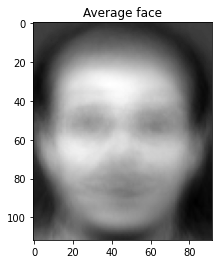

In [ ]:
# # # Computing the mean face
average_face = np.zeros((1,height*width)) ##Psi in the paper
for i in trainsetmatrix:
  average_face = np.add(average_face, i)
average_face = np.divide(average_face, float(trainsetlen)).flatten()

print(f'Shape of mean face: {average_face.shape}')

plt.imshow(average_face.reshape(height,width), cmap="gray")
plt.title("Average face")
plt.show()

In [ ]:
# # # Calculating the normalised faces
diff_face = np.ndarray(shape=(trainsetlen, height * width), dtype=np.float64) # # # 'A' matrix in the paper
for i in range(trainsetlen):
  diff_face[i] = np.subtract(trainsetmatrix[i], average_face) # # # Phi{i} matrix in the paper
print(f'Shape of matrix of normalised faces: {diff_face.shape}')
# print(diff_face)

Shape of matrix of normalised faces: (240, 10304)


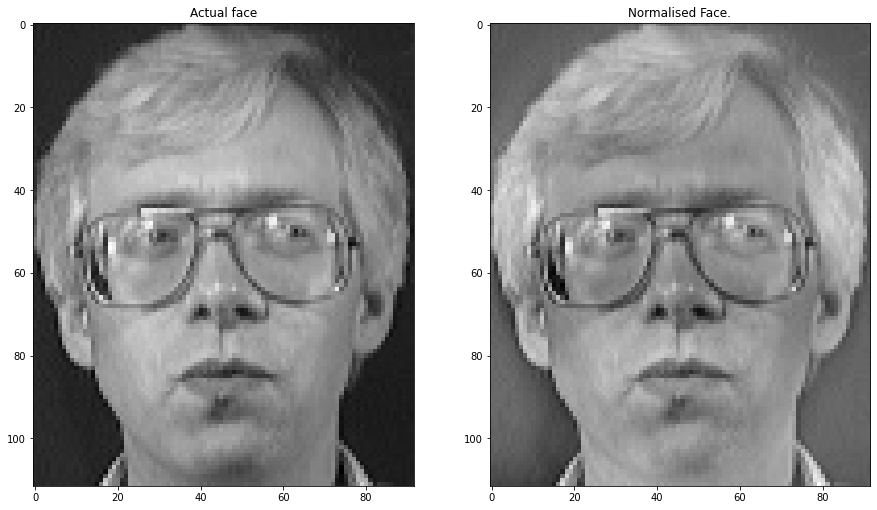

In [ ]:
# # # An example to show the difference between actual image and image-average_image

fig, axes = plt.subplots(1,2,figsize=(15,20))
img = (np.add(diff_face[9], average_face)).reshape(height,width)
img2 = diff_face[9].reshape(height, width)

axes[0].imshow(img, cmap = "gray")
axes[0].title.set_text("Actual face")

axes[1].imshow(img2, cmap= "gray")
axes[1].title.set_text("Normalised Face.")

plt.show()

In [ ]:
# # # Calculating the Covariance Matrix.
C = np.dot(diff_face, diff_face.T) # # # C = A.(A.T) from the paper
print(f'Shape of Covariance Matrix: {C.shape}')
# print(C)

Shape of Covariance Matrix: (240, 240)


In [ ]:
# # # This helps calculate the eigen value and eigen vectors from the Cov matrix
eigval, eigvec = np.linalg.eig(C)
# eigval, eigvec = np.absolute(eigval), np.absolute(eigvec)
print(f'Shape of eigen value Matrix:{eigval.shape}')
print(f'Shape of eigen vector Matrix:{eigvec.shape}')

# # # Creating a list of eigen vector and corresponding eigen value.
eigpairs = []
for i in range(len(eigval)):
  eigpairs.append((eigval[i],eigvec[i]))
eigpairs.sort(reverse=True)
for i in range(len(eigval)):
  eigval[i] = eigpairs[i][0]
  eigvec[:,i] = eigpairs[i][1]
eigval = np.absolute(eigval)
eigvec = np.absolute(eigvec)

Shape of eigen value Matrix:(240,)
Shape of eigen vector Matrix:(240, 240)


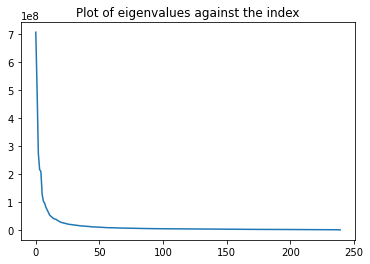

In [ ]:
# # # Taking only the important eigen vectors that account for meaningful eigenvalues.

plt.plot(eigval)
plt.title("Plot of eigenvalues against the index")
plt.show()

Shape of eigenspace: (50, 10304)


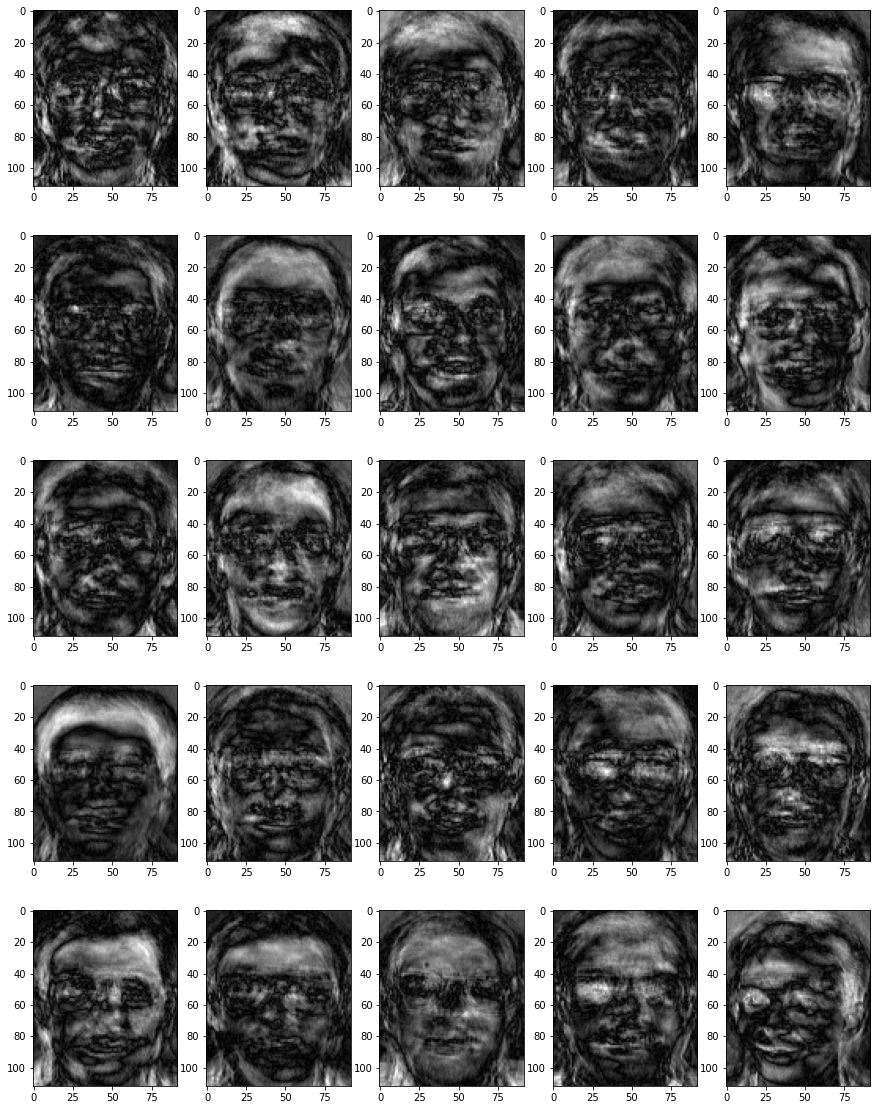

In [ ]:
# # # Kindly change the value of m corresponding to the plot that gets showed above.
m = 50 # # #m is the required number of eigenvectors

req_images = np.array(eigvec[:m]).transpose()
eigspace = np.absolute(np.dot(diff_face.transpose(), req_images)).transpose() # # # Forming the eigenfaces u = v.Phi from the paper
print(f'Shape of eigenspace: {eigspace.shape}')

# # # Plotting some of these eigen faces
fig, axes = plt.subplots(5,5,figsize=(15,20))
for i in range(25):
  img = eigspace[i].reshape(height, width)
  axes[i//5][i%5].imshow(img, cmap= "gray")
plt.show()

In [ ]:
# # # Calculating the weight matrix (Omega.T in the paper)
w = np.array([np.dot(eigspace,i) for i in diff_face])
print(f'Shape of Weight matrix: {w.shape}')

Shape of Weight matrix: (240, 50)


In [ ]:
# # # Defining the euclidean distance function
def eucliddist(w, w_unk):
  diff = w - w_unk
  diffs = (np.linalg.norm(diff, axis=1))
  return diffs

In [ ]:
correct = 0
num_of_images = 0

# # # A recogniser function used for accuracy calculation.
def final_recogniser(img, trainset, eigspace, w, theta1, theta0):
  global num_of_images, correct
  unkface = cv2.imread(folder + str(img), cv2.IMREAD_GRAYSCALE)
  unkfacemat = np.array(unkface, dtype="float64").flatten()
  diffunkface = np.subtract(unkfacemat, average_face)
  num_of_images += 1

  w_unk = np.dot(eigspace, diffunkface)
  norms = eucliddist(w, w_unk)
  i = np.argmin(eucliddist(w, w_unk))

  # print(trainset[index].split(".")[0])

  # theta1 and theta2 represent the two thresholds as described in the paper.

  if (norms[i]<theta1):
    if (norms[i]<theta0):
      if (str(img).split("/")[0] == trainset[i].split("/")[0]):
        correct += 1
        # print(f'Identified as subject: {trainset[i].split("/")[0]}')

      else:
        correct += 0
        # print(f'Identified as subject: {trainset[i].split("/")[0]}')

    else:
      print(f'Unknown face; Face not in training Set; Can be added to the training Set')

  else:
    print("Not a face")

In [ ]:
correct = 0
num_of_images = 0
for img in testset:
  final_recogniser(img, trainset, eigspace, w, theta1 = 800000000, theta0 = 20000000)
print(f'Identified {correct} correctly out of {num_of_images}')
print(f'Accuracy: {(correct/num_of_images)*100} %')







Identified 110 correctly out of 160
Accuracy: 68.75 %


1 matches are found for this image
Face Not in Dataset; Can be added to the dataset
Not a face


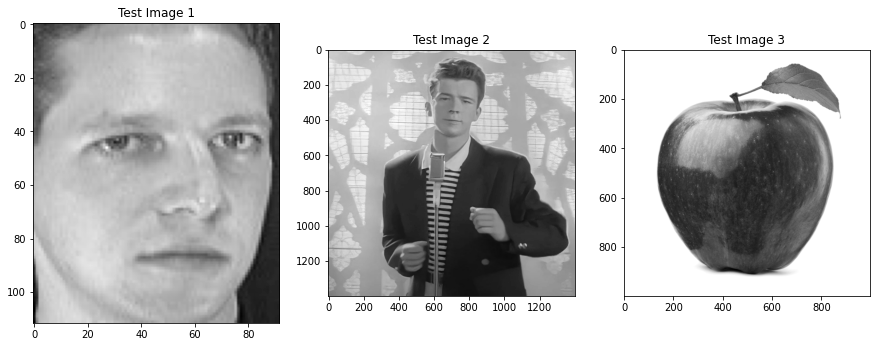

In [ ]:
# # # Function that helps in identifying whether the image is present in the dataset and if yes, how many matches are present for a new image.
count = 0
count2 = 0
match = []
def image_matches(img, trainset, eigspace, w, theta1, theta0):
  global count, count2, match
  unkfacemat = np.array(img, dtype="float64").flatten()
  diffunkface = np.subtract(unkfacemat, average_face)

  w_unk = np.dot(eigspace, diffunkface)

  norms = eucliddist(w, w_unk)
  count = 0
  count2 = 0
  for norm in range(len(norms)):
    # print(norms[norm])
    if(norms[norm] < theta1):
      if(norms[norm] < theta0):
        count += 1
        if(trainset[norm].split("/")[0] not in match):
          match.append(trainset[norm].split("/")[0])
      else:
        count2 += 1
    
  if(count == 0 and count2 == 0):
    print(f'Not a face')
  if(count != 0):
    print(f'{count} matches are found for this image')
  if(count == 0 and count2 != 0):
    print('Face Not in Dataset; Can be added to the dataset')

fig, axes = plt.subplots(1,3,figsize=(15,20))

img4 = cv2.imread('/content/2.jpg', cv2.IMREAD_GRAYSCALE)
axes[0].imshow(img4, cmap = "gray")
axes[0].title.set_text("Test Image 1")

img5 = cv2.imread('/content/rickroll.jpg', cv2.IMREAD_GRAYSCALE)
axes[1].imshow(img5, cmap= "gray")
axes[1].title.set_text("Test Image 2")
img5 = np.resize(img5, (height*width, 1))

img6 = cv2.imread('/content/apple.jpg', cv2.IMREAD_GRAYSCALE)
axes[2].imshow(img6, cmap= "gray")
axes[2].title.set_text("Test Image 3")
img6 = np.resize(img6, (height*width, 1))

match = []
image_matches(img4, trainset, eigspace, w, 140000000, 1400000) # # #Similarly, we could do the same for all test images.
image_matches(img5, trainset, eigspace, w, 140000000, 1400000)
image_matches(img6, trainset, eigspace, w, 140000000, 1400000)

plt.show()